# ECG Use Case

In [1]:
import pandas as pd

df_train=pd.read_csv('ECGData/ECG200LSTM_train.csv',header=0)
df_test=pd.read_csv('ECGData/ECG200LSTM_test.csv',header=0)
target_column="Class"

X_train=df_train.drop([target_column],axis=1).to_numpy()
y_train=df_train[target_column].to_numpy()

X_test=df_test.drop([target_column],axis=1).to_numpy()
y_test=df_test[target_column].to_numpy()

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc = SVC(kernel='rbf',C=5,class_weight='balanced',probability=True)
svc.fit(X_train, y_train)


SVC(C=5, class_weight='balanced', probability=True)

In [3]:
import joblib 

joblib.dump(svc,"ECGmodel.pkl")

['ECGmodel.pkl']

# Performance

In [4]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

labels=["Normal Heartbeat","Myocardial Infarction"]
explainer = ClassifierExplainer(svc, df_test.drop([target_column],axis=1), df_test[target_column],labels=labels)

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [5]:
from explainerdashboard.dashboard_components.classifier_components import ConfusionMatrixComponent

ConfusionMatrixComponent(explainer).save_html("ECG_Confusion_Matrix.html")

Calculating confusion matrices...
Calculating prediction probabilities...


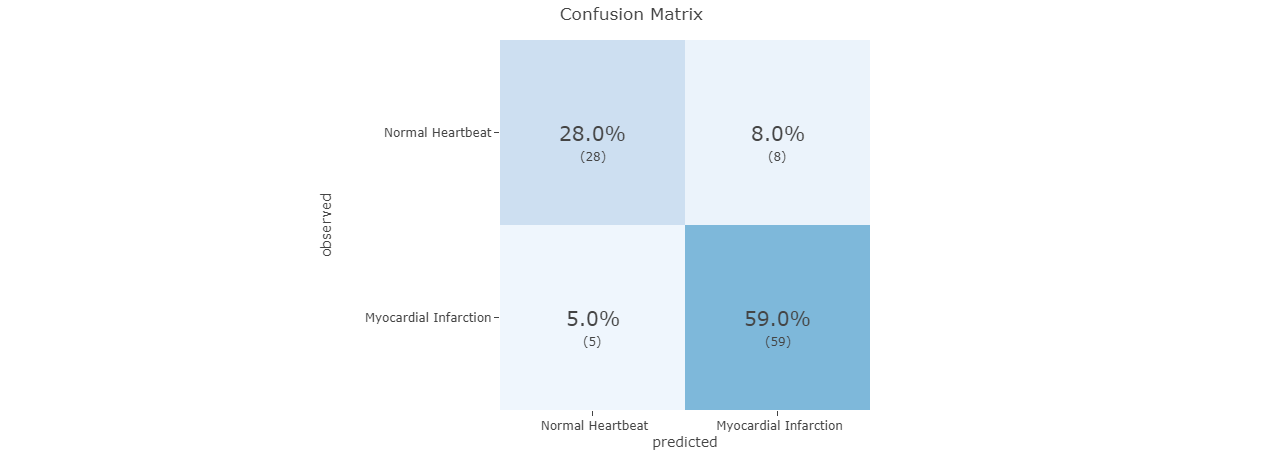

In [6]:
from explainerdashboard.dashboard_components.classifier_components import RocAucComponent
RocAucComponent(explainer).save_html("ECG_ROC.html")

Calculating roc auc curves...


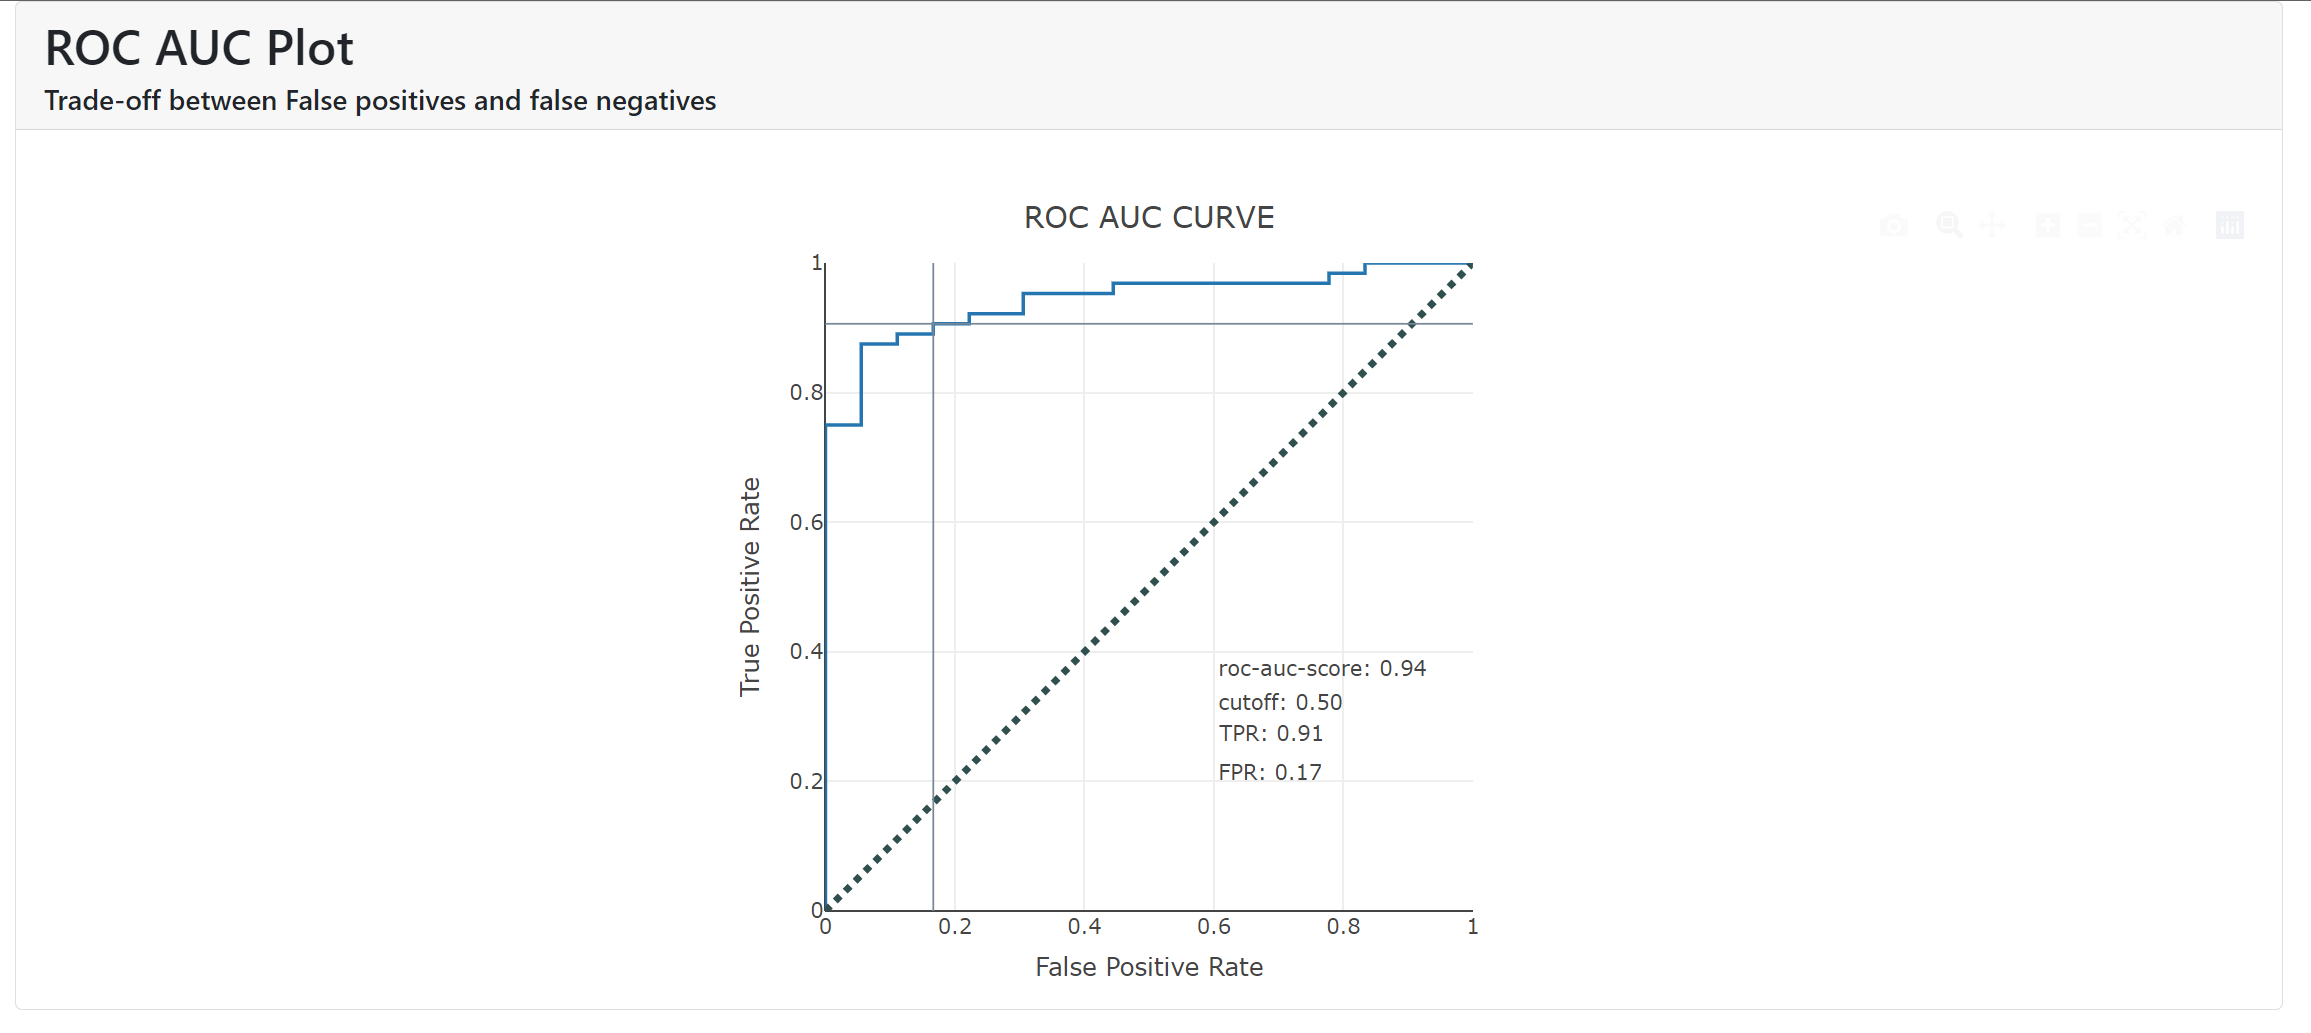

In [7]:
from explainerdashboard.dashboard_components.classifier_components import ClassifierModelSummaryComponent
ClassifierModelSummaryComponent(explainer).save_html("ECG_Performance_Summary.html")

Calculating metrics...




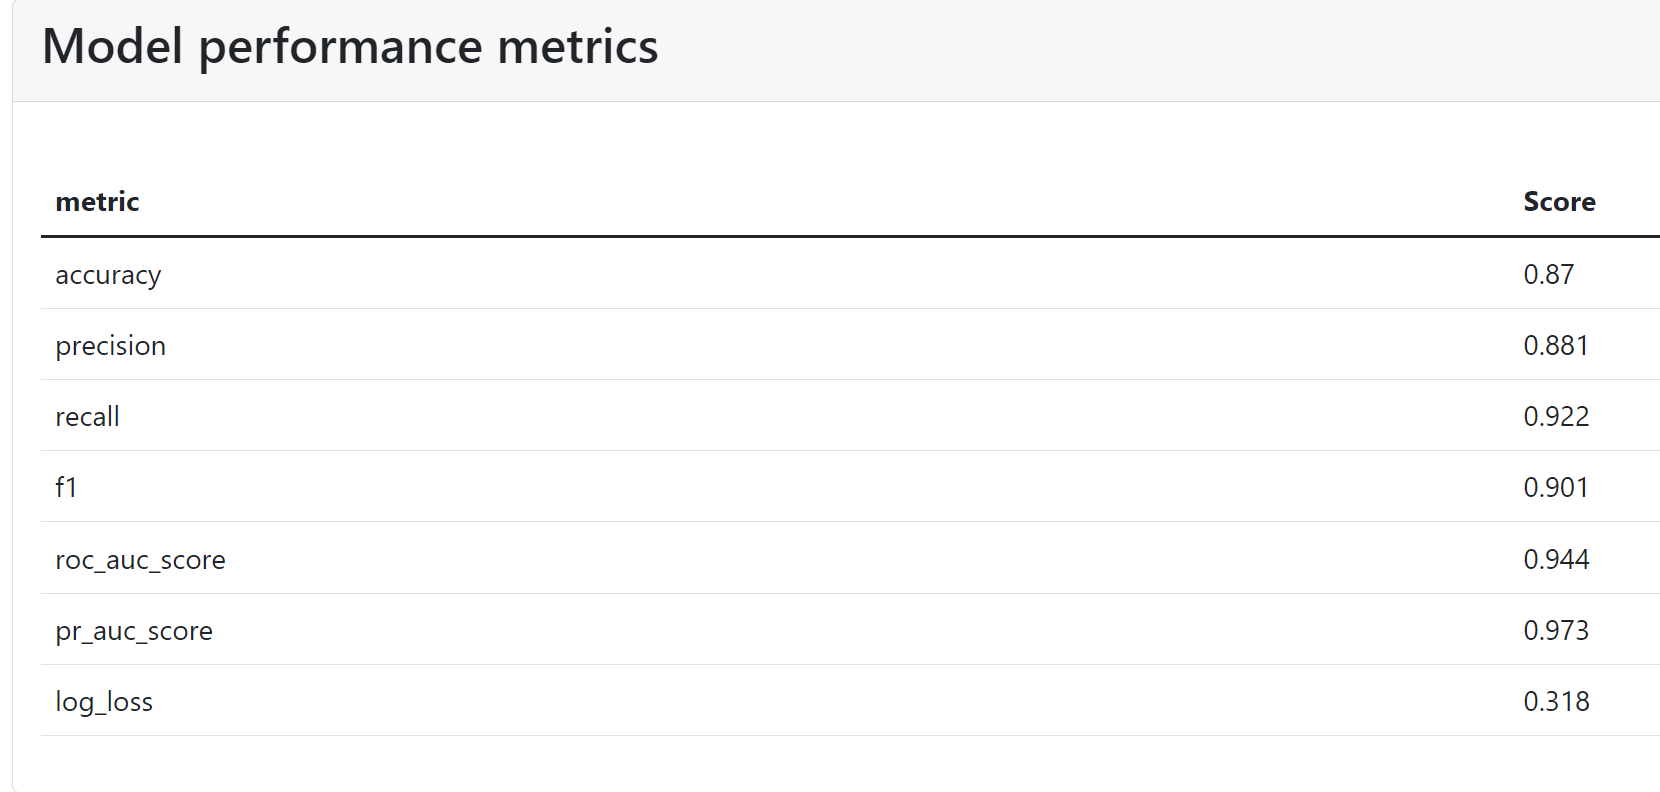

#### For Positive Class (Myocardial Infarction)*

# Explanation Strategy

If you want to view the full explanation strategy and test the methods using the iSee Explanation Experience Editor, you can import the json of the project for this usecase directly in the Editor (see ECGExplanationExperience.json). Keep in mind that the Editor is still a work in progress and it's possible that you encounter some issues. For this reason, I have included the low-level HTTP requests to the iSee Explainer Library to replicate the results. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Predicted Class: Myocardial Infarction


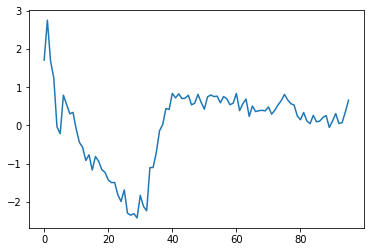

In [9]:
instance_1=np.array([ 1.7092211 ,  2.7528523 ,  1.6829902 ,  1.2418618 , -0.0379721 ,
       -0.21758892,  0.78964563,  0.54742834,  0.30210378,  0.33906542,
       -0.10047946, -0.44529518, -0.57598109, -0.9207572 , -0.77172504,
       -1.1704455 , -0.81815039, -0.94015055, -1.1584194 , -1.2336452 ,
       -1.4284852 , -1.4998186 , -1.4969223 , -1.8198198 , -1.9943259 ,
       -1.6908569 , -2.300812  , -2.3535052 , -2.3138032 , -2.4247686 ,
       -1.8332078 , -2.1235422 , -2.2359136 , -1.1068787 , -1.1048193 ,
       -0.71410217, -0.14530638,  0.02218502,  0.44112003,  0.41526343,
        0.83749722,  0.71985104,  0.82643145,  0.70108358,  0.71184173,
        0.78842372,  0.53612366,  0.58108428,  0.813672  ,  0.60100423,
        0.42498647,  0.74736093,  0.7942348 ,  0.75368838,  0.76415348,
        0.59061615,  0.75449047,  0.69706223,  0.53816061,  0.58230398,
        0.8357462 ,  0.38417015,  0.56462207,  0.6884838 ,  0.23341844,
        0.50537   ,  0.35998205,  0.38358787,  0.39429369,  0.3790856 ,
        0.48102232,  0.29297337,  0.3981071 ,  0.53330449,  0.64801905,
        0.8102375 ,  0.66636109,  0.56732651,  0.53227073,  0.24854627,
        0.14714747,  0.33657243,  0.11446555,  0.04391219,  0.26192804,
        0.09423755,  0.11046463,  0.20485062,  0.2573572 , -0.05526672,
        0.11102102,  0.30866849,  0.04872402,  0.07216692,  0.34802451,
        0.6584883 ])

plt.plot(instance_1)
print("Predicted Class: " + labels[int(svc.predict(instance_1.reshape(1,-1))[0])])

Predicted Class: Normal Heartbeat


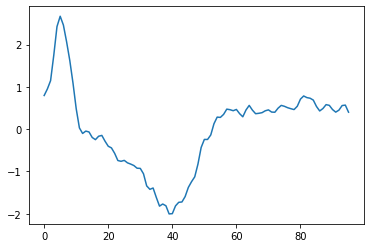

In [10]:
instance_2= np.array([ 0.79567475,  0.9502404 ,  1.1466679 ,  1.7491252 ,  2.4258016 ,
        2.6709641 ,  2.4624665 ,  2.0670781 ,  1.6233579 ,  1.088265  ,
        0.48325747,  0.02906767, -0.10205782, -0.04598573, -0.0671826 ,
       -0.19722394, -0.2485563 , -0.16774872, -0.14832422, -0.28560195,
       -0.40439817, -0.44400887, -0.57232183, -0.74243746, -0.76085833,
       -0.73913887, -0.79702819, -0.82658122, -0.86103224, -0.92441019,
       -0.92853065, -1.0558294 , -1.342795  , -1.4240432 , -1.3925323 ,
       -1.6146891 , -1.8213559 , -1.7714491 , -1.812784  , -2.0056145 ,
       -1.9994011 , -1.8152135 , -1.7312891 , -1.7231695 , -1.595469  ,
       -1.3787969 , -1.2431864 , -1.1277632 , -0.82712383, -0.43367487,
       -0.24352558, -0.24418688, -0.13786127,  0.12819149,  0.28449563,
        0.27788564,  0.34869189,  0.47325956,  0.46019376,  0.43604088,
        0.46587407,  0.36677829,  0.29225774,  0.45376562,  0.5617359 ,
        0.44966833,  0.36502024,  0.37485964,  0.38958319,  0.43390585,
        0.45581797,  0.40363272,  0.39960026,  0.49559394,  0.56183973,
        0.54000099,  0.5069879 ,  0.48365207,  0.46294595,  0.5407128 ,
        0.71064026,  0.7848302 ,  0.74619101,  0.73161313,  0.68733161,
        0.53590909,  0.43032121,  0.48710724,  0.57974138,  0.56283371,
        0.46409311,  0.40246792,  0.44930481,  0.55808223,  0.56857857,
        0.40117688])

plt.plot(instance_2)
print("Predicted Class: " + labels[int(svc.predict(instance_2.reshape(1,-1))[0])])

In [11]:
# iSee API works with base64-encoded images

import base64
from io import BytesIO
from PIL import Image

def PIL_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue())
    return img_str.decode("utf-8")

def base64_to_PIL(b64_str):
    img=b64_str.encode("utf-8")
    image_bytes=base64.b64decode(img)
    img=Image.open(BytesIO(image_bytes))
    return img

In [12]:
# preparing the generic body of the requests

import requests
import json
import copy

#If running locally, change to "http://localhost:5000/Timeseries/"
base_url = "https://explainers-dev.isee4xai.com/Timeseries/"  

base_payload = {
  "size": 96,
  "type": "array",
  "id": "ECG200LSTM"
}
headers = {
  'Content-Type': 'application/json'
}



# LIMESegment 
**Note:** small variations between executions are expected

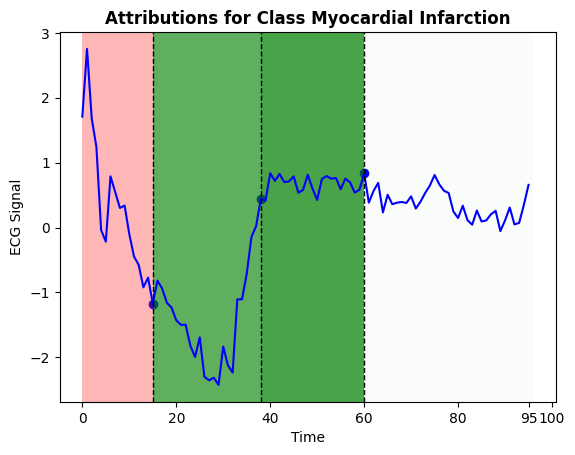

In [13]:
url=base_url+"LIMESegment"

payload=copy.deepcopy(base_payload)
payload["instance"]=instance_1.tolist()

response = requests.request("POST", url, headers=headers, data=json.dumps(payload))
base64_to_PIL(json.loads(response.text)["explanation"])

# NEVES
**Note:** small variations between executions are expected

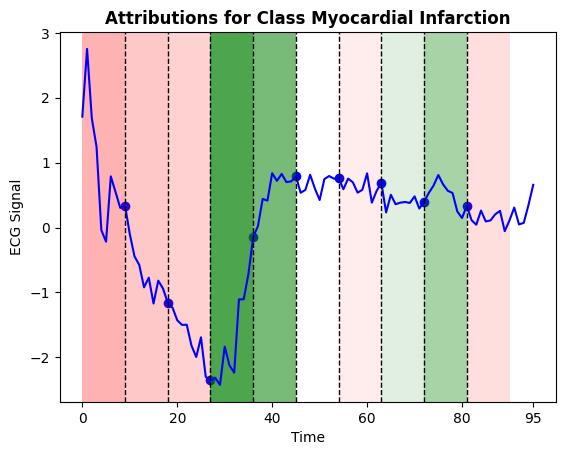

In [14]:
url=base_url+"NEVES"

payload=copy.deepcopy(base_payload)
payload["instance"]=instance_1.tolist()

response = requests.request("POST", url, headers=headers, data=json.dumps(payload))
base64_to_PIL(json.loads(response.text)["explanation"])

# LEFTIST 
**Note:** This method method varies a lot between executions

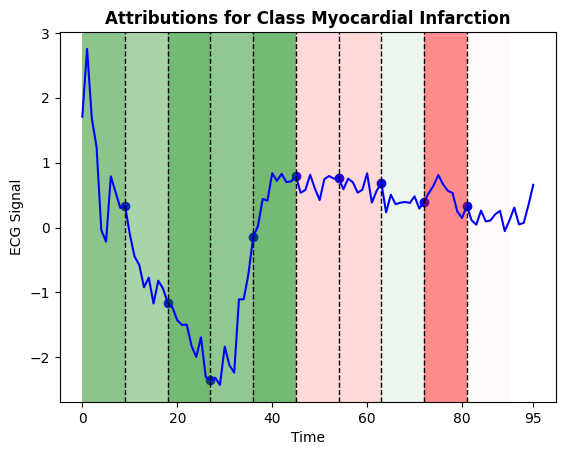

In [15]:
url=base_url+"LEFTIST"

payload=copy.deepcopy(base_payload)
payload["instance"]=instance_1.tolist()

response = requests.request("POST", url, headers=headers, data=json.dumps(payload))
base64_to_PIL(json.loads(response.text)["explanation"])

# Nearest Neighbours

In [16]:
url=base_url+"NearestNeighbours"

payload=copy.deepcopy(base_payload)
payload["instance"]=instance_1.tolist()
payload["params"]={
    "n_neighbours":3,
    #"sample": 100
  }

response = requests.request("POST", url, headers=headers, data=json.dumps(payload))
with open("nearest-neigbours.html", "w") as file:
    file.write(json.loads(response.text)["explanation"])

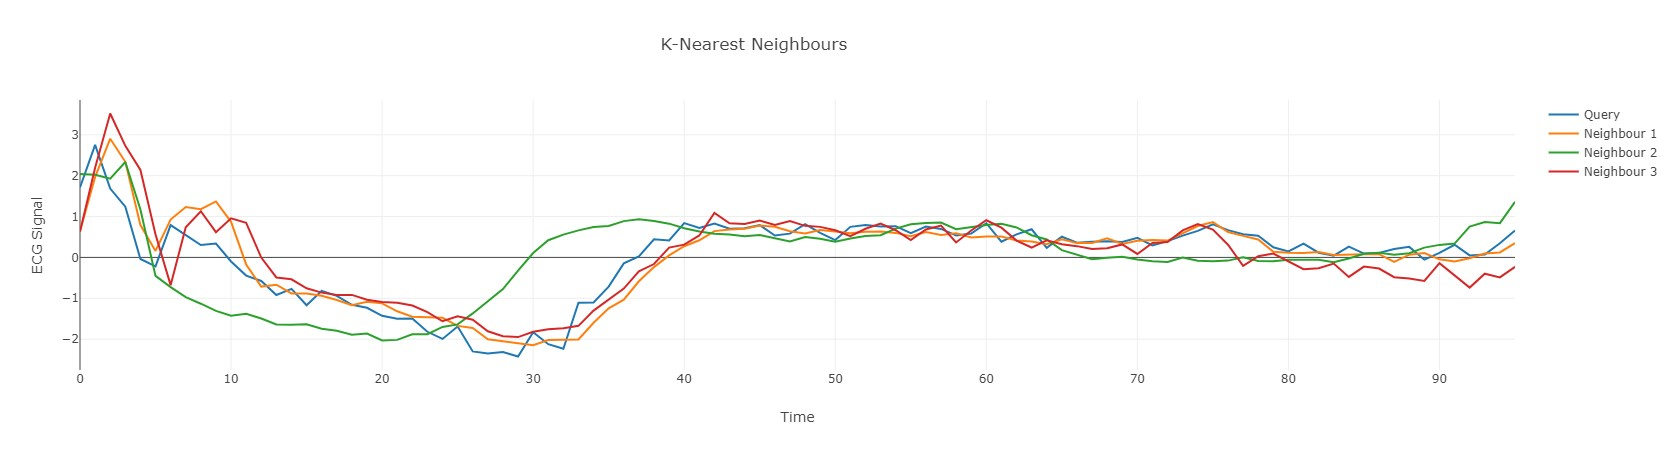

# Native Guides 

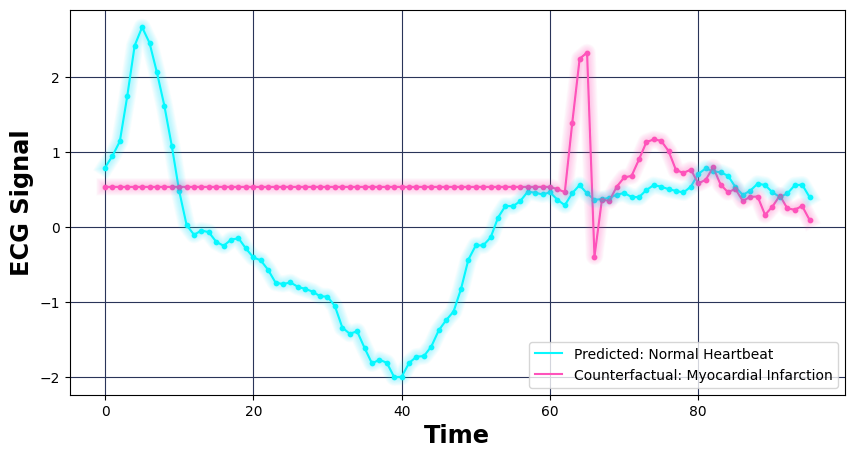

In [17]:
url=base_url+"NativeGuides"

payload=copy.deepcopy(base_payload)
payload["instance"]=instance_2.tolist()


response = requests.request("POST", url, headers=headers, data=json.dumps(payload))
base64_to_PIL(json.loads(response.text)["explanation"])